In [1]:
# libraries
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


In [2]:
df_raw = pd.read_csv('data.csv') # to import the dataset into a variable
df_raw.columns = ["duration", 
              "protocol_type", 
              "service", 
              "flag", 
              "src_bytes", 
              "dst_bytes", 
              "land", 
              "wrong_fragment", 
              "urgent", 
              "hot", 
              "num_failed_logins", 
              "logged_in", 
              "num_compromised", 
              "root_shell", 
              "su_attempted", 
              "num_root", 
              "num_file_creations", 
              "num_shells", 
              "num_access_files", 
              "num_outbound_cmds",
              "is_host_login",
              "is_guest_login",
              "count",
              "srv_count",
              "serror_rate",
              "srv_serror_rate",
              "rerror_rate",
              "srv_rerror_rate",
              "same_srv_rate",
              "diff_srv_rate",
              "srv_diff_host_rate",
              "dst_host_count",
              "dst_host_srv_count",
              "dst_host_same_srv_rate",
              "dst_host_diff_srv_rate",
              "dst_host_same_src_port_rate",
              "dst_host_srv_diff_host_rate",
              "dst_host_serror_rate",
              "dst_host_srv_serror_rate",
              "dst_host_rerror_rate",
              "dst_host_srv_rerror_rate",
              "type"
]
# Splitting the attributes into independent and dependent attributes

In [3]:
df_raw.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type
0,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
df_raw.shape

(4898430, 42)

In [5]:
condensed_df = df_raw[["protocol_type", 
                       "service", 
                       "flag", 
                       "dst_bytes",  
                       "type"]]
condensed_df

,protocol_type,service,flag,dst_bytes,type
0,tcp,http,SF,4528,normal.
1,tcp,http,SF,1228,normal.
2,tcp,http,SF,2032,normal.
3,tcp,http,SF,486,normal.
4,tcp,http,SF,1282,normal.
...,...,...,...,...,...
4898425,tcp,http,SF,2288,normal.
4898426,tcp,http,SF,236,normal.
4898427,tcp,http,SF,3610,normal.
4898428,tcp,http,SF,1234,normal.


In [6]:
rep_protocol = {}

for val in condensed_df["protocol_type"]:
    rep_protocol.update({val:True})
rep_protocol

count = 0
for key in rep_protocol:
    rep_protocol.update({key:count})
    count+=1
rep_protocol

{'tcp': 0, 'udp': 1, 'icmp': 2}

In [7]:
condensed_df = condensed_df.replace({"protocol_type": rep_protocol})

In [8]:
condensed_df

,protocol_type,service,flag,dst_bytes,type
0,0,http,SF,4528,normal.
1,0,http,SF,1228,normal.
2,0,http,SF,2032,normal.
3,0,http,SF,486,normal.
4,0,http,SF,1282,normal.
...,...,...,...,...,...
4898425,0,http,SF,2288,normal.
4898426,0,http,SF,236,normal.
4898427,0,http,SF,3610,normal.
4898428,0,http,SF,1234,normal.


In [9]:
rep_service = {}

for val in condensed_df["service"]:
    rep_service.update({val:True})

count = 0
for key in rep_service:
    rep_service.update({key:count})
    count+=1
rep_service

{'http': 0,
 'smtp': 1,
 'domain_u': 2,
 'auth': 3,
 'finger': 4,
 'telnet': 5,
 'eco_i': 6,
 'ftp': 7,
 'ntp_u': 8,
 'ecr_i': 9,
 'other': 10,
 'urp_i': 11,
 'private': 12,
 'pop_3': 13,
 'ftp_data': 14,
 'netstat': 15,
 'daytime': 16,
 'ssh': 17,
 'echo': 18,
 'time': 19,
 'name': 20,
 'whois': 21,
 'domain': 22,
 'mtp': 23,
 'gopher': 24,
 'remote_job': 25,
 'rje': 26,
 'ctf': 27,
 'supdup': 28,
 'link': 29,
 'systat': 30,
 'discard': 31,
 'X11': 32,
 'shell': 33,
 'login': 34,
 'imap4': 35,
 'nntp': 36,
 'uucp': 37,
 'pm_dump': 38,
 'IRC': 39,
 'Z39_50': 40,
 'netbios_dgm': 41,
 'ldap': 42,
 'sunrpc': 43,
 'courier': 44,
 'exec': 45,
 'bgp': 46,
 'csnet_ns': 47,
 'http_443': 48,
 'klogin': 49,
 'printer': 50,
 'netbios_ssn': 51,
 'pop_2': 52,
 'nnsp': 53,
 'efs': 54,
 'hostnames': 55,
 'uucp_path': 56,
 'sql_net': 57,
 'vmnet': 58,
 'iso_tsap': 59,
 'netbios_ns': 60,
 'kshell': 61,
 'urh_i': 62,
 'http_2784': 63,
 'harvest': 64,
 'aol': 65,
 'tftp_u': 66,
 'http_8001': 67,
 'tim_i'

In [10]:
condensed_df = condensed_df.replace({"service": rep_service})


In [11]:
condensed_df

,protocol_type,service,flag,dst_bytes,type
0,0,0,SF,4528,normal.
1,0,0,SF,1228,normal.
2,0,0,SF,2032,normal.
3,0,0,SF,486,normal.
4,0,0,SF,1282,normal.
...,...,...,...,...,...
4898425,0,0,SF,2288,normal.
4898426,0,0,SF,236,normal.
4898427,0,0,SF,3610,normal.
4898428,0,0,SF,1234,normal.


In [12]:
rep_flag = {}

for val in condensed_df["flag"]:
    rep_flag.update({val:True})

count = 0
for key in rep_flag:
    rep_flag.update({key:count})
    count+=1
rep_flag

{'SF': 0,
 'S2': 1,
 'S1': 2,
 'S3': 3,
 'OTH': 4,
 'REJ': 5,
 'RSTO': 6,
 'S0': 7,
 'RSTR': 8,
 'RSTOS0': 9,
 'SH': 10}

In [13]:
condensed_df = condensed_df.replace({"flag": rep_flag})

In [14]:
condensed_df

,protocol_type,service,flag,dst_bytes,type
0,0,0,0,4528,normal.
1,0,0,0,1228,normal.
2,0,0,0,2032,normal.
3,0,0,0,486,normal.
4,0,0,0,1282,normal.
...,...,...,...,...,...
4898425,0,0,0,2288,normal.
4898426,0,0,0,236,normal.
4898427,0,0,0,3610,normal.
4898428,0,0,0,1234,normal.


In [15]:
rep_type = {}

for val in condensed_df["type"]:
    rep_type.update({val:True})

for key in rep_type:
    rep_type.update({key:1})
    
rep_type.update({'normal.':0})
rep_type

{'normal.': 0,
 'buffer_overflow.': 1,
 'loadmodule.': 1,
 'perl.': 1,
 'neptune.': 1,
 'smurf.': 1,
 'guess_passwd.': 1,
 'pod.': 1,
 'teardrop.': 1,
 'portsweep.': 1,
 'ipsweep.': 1,
 'land.': 1,
 'ftp_write.': 1,
 'back.': 1,
 'imap.': 1,
 'satan.': 1,
 'phf.': 1,
 'nmap.': 1,
 'multihop.': 1,
 'warezmaster.': 1,
 'warezclient.': 1,
 'spy.': 1,
 'rootkit.': 1}

In [16]:
condensed_df = condensed_df.replace({"type": rep_type})
condensed_df

,protocol_type,service,flag,dst_bytes,type
0,0,0,0,4528,0
1,0,0,0,1228,0
2,0,0,0,2032,0
3,0,0,0,486,0
4,0,0,0,1282,0
...,...,...,...,...,...
4898425,0,0,0,2288,0
4898426,0,0,0,236,0
4898427,0,0,0,3610,0
4898428,0,0,0,1234,0


In [17]:
condensed_df.shape

(4898430, 5)

In [18]:
# fake note id
import matplotlib.pyplot as plt

#libraries
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#import tensorflow

from keras import models
from keras import layers

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


2022-12-29 17:35:55.388982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-29 17:35:55.475389: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-29 17:35:55.477483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-29 17:35:55.477491: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Instructions for updating:
non-resource variables are not supported in the long term


In [19]:
#reading the dataset
df = condensed_df

def read_dataset():
    #print
    X = df[df.columns[0:4]].values
    y = df[df.columns[4]]
    
    
    #encode the dependant variable
    Y = one_hot_encode(y)
    print(X.shape)
    print(Y.shape)
    return(X,Y)

#define encoder function
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

#Read the dataset
X, Y = read_dataset()



(4898430, 4)
(4898430, 2)


In [20]:
#shufffle the dataset to mix up the rows
X,Y = shuffle(X, Y,random_state = 1)

#convert the dataser into train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=415)

#Inspect the shaoe of the training and testing
print(train_x.shape)
print(train_y.shape)
print(train_y)
print(test_x.shape)


(3918744, 4)
(3918744, 2)
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]
(979686, 4)


In [21]:
#define the important parameters and variables to work with the tensors
learning_rate = 0.3
training_epochs = 100
cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
print("n_dim", n_dim)
n_class = 2
model_path = "model"



n_dim 4


In [22]:
#define the number of hidden layers and number of neurons for each layer
n_hidden_1 = 4
n_hidden_2 = 4
n_hidden_3 = 4
n_hidden_4 = 4

x = tf.placeholder(tf.float32, [None, n_dim])
W = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

y_


<tf.Tensor 'Placeholder_1:0' shape=(?, 2) dtype=float32>

In [23]:
#define the model

def multilayer_perception(x, weights, biases):
    
    #hidden layer with RELU activations
    layer_1 = tf.add(tf.matmul(x, weights["h1"]), biases["b1"])
    layer_1 = tf.nn.relu(layer_1)
    
    #hidden layer with sigmoid activations
    layer_2 = tf.add(tf.matmul(layer_1, weights["h2"]), biases["b2"])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    #hidden layer with sigmoid activations
    layer_3 = tf.add(tf.matmul(layer_2, weights["h3"]), biases["b3"])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    #hidden layer with RELU activations
    layer_4 = tf.add(tf.matmul(layer_3, weights["h4"]), biases["b4"])
    layer_4 = tf.nn.relu(layer_4)
    
    #output layer with linear activations
    out_layer = tf.matmul(layer_4, weights["out"]) + biases["out"]
    return out_layer
    
    


In [24]:
#Define the weights and biases for each layer

weights = {
    "h1" : tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    "h2" : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    "h3" : tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    "h4" : tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    "out" : tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    "b1" : tf.Variable(tf.truncated_normal([n_hidden_1])),
    "b2" : tf.Variable(tf.truncated_normal([n_hidden_2])),
    "b3" : tf.Variable(tf.truncated_normal([n_hidden_3])),
    "b4" : tf.Variable(tf.truncated_normal([n_hidden_4])),
    "out" : tf.Variable(tf.truncated_normal([n_class]))
}
    


In [25]:
# Initialize all the variables

init = tf.global_variables_initializer()

saver = tf.train.Saver()



In [26]:
#call your model defined
mp = multilayer_perception(x, weights, biases)

print(y_.shape)

(?, 2)


In [27]:
#define the cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=mp, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

#training_step = tf.train.GradientDescentOptimizer(learning_rate)

In [28]:
sess = tf.Session()
sess.run(init)


2022-12-29 17:35:57.724679: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-29 17:35:57.724843: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-29 17:35:57.724902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-12-29 17:35:57.724944: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-12-29 17:35:57.724984: W tensorflow/c

In [29]:
#calculate the cost and accuracy for each epoch

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x:train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x:train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(mp,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    #print 
    
    pred_y = sess.run(mp, feed_dict ={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print("epoch : ", epoch, "-", "cost: ", cost, "- MSE: ", mse_, "- train Accuracy: ", accuracy)
    
save_path = saver.save(sess, model_path)
print("Model saved in file: %s" % save_path)



epoch :  0 - cost:  0.5218139 - MSE:  1.2644162453925398 - train Accuracy:  0.8014527
epoch :  1 - cost:  0.4967897 - MSE:  1.3698831440521808 - train Accuracy:  0.8014527
epoch :  2 - cost:  0.48038384 - MSE:  1.4705472939887583 - train Accuracy:  0.8014527
epoch :  3 - cost:  0.4705696 - MSE:  1.553789305374622 - train Accuracy:  0.8014527
epoch :  4 - cost:  0.46420595 - MSE:  1.6224499467365259 - train Accuracy:  0.8014527
epoch :  5 - cost:  0.45980495 - MSE:  1.6778949426875969 - train Accuracy:  0.8014527
epoch :  6 - cost:  0.4565152 - MSE:  1.7211085041362981 - train Accuracy:  0.8014527
epoch :  7 - cost:  0.4538275 - MSE:  1.7539068633635233 - train Accuracy:  0.8014527
epoch :  8 - cost:  0.4514436 - MSE:  1.7779874036147958 - train Accuracy:  0.8014527
epoch :  9 - cost:  0.44919217 - MSE:  1.795159832445366 - train Accuracy:  0.8014527
epoch :  10 - cost:  0.44697964 - MSE:  1.8068032382954573 - train Accuracy:  0.8014527
epoch :  11 - cost:  0.4447454 - MSE:  1.814007373

epoch :  94 - cost:  0.15401271 - MSE:  2.82810169056899 - train Accuracy:  0.9806428
epoch :  95 - cost:  0.15059313 - MSE:  3.036068013298939 - train Accuracy:  0.9806428
epoch :  96 - cost:  0.14842814 - MSE:  3.1774667796465894 - train Accuracy:  0.9806428
epoch :  97 - cost:  0.14802125 - MSE:  3.281003279800652 - train Accuracy:  0.9806428
epoch :  98 - cost:  0.14883964 - MSE:  2.8965982240642654 - train Accuracy:  0.9806425
epoch :  99 - cost:  0.14557815 - MSE:  3.123867879812961 - train Accuracy:  0.9806428
Model saved in file: model


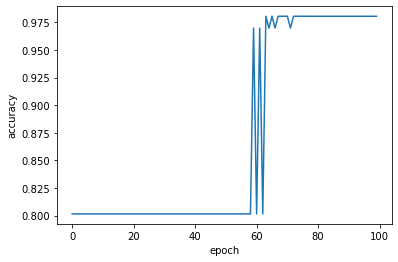

In [30]:
#plot Accuracy Graph
plt.plot(accuracy_history)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()




In [31]:
#print final accuracy

correct_prediction = tf.equal(tf.argmax(mp, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print ("test accuracy: ", (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))
            
                              


test accuracy:  0.98057336


In [32]:
#print the final mean sq error
pred_y = sess.run(mp, feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y) - test_y)                              
print ("Mse: %.4f" % sess.run(mse)) 

Mse: 2.5812
